# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

In [1]:
# imports
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make prediction, we will consider a NN that depend on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [3]:
# generate training inputs

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 200)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

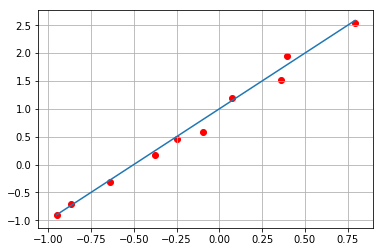

In [4]:
# plot training and target dataset

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); 
plt.show();

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [5]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [6]:
# get a summary of our composed model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [7]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 200 samples, validate on 10 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/60
200/200 [==============================] - 0s 469us/sample - loss: 1.0518 - mean_squared_error: 1.0518 - val_loss: 0.6685 - val_mean_squared_error: 0.6685
Epoch 2/60
200/200 [==============================] - 0s 65us/sample - loss: 0.8232 - mean_squared_error: 0.8232 - val_loss: 0.5122 - val_mean_squared_error: 0.5122
Epoch 3/60
200/200 [==============================] - 0s 64us/sample - loss: 0.6504 - mean_squared_error: 0.6504 - val_loss: 0.3944 - val_mean_squared_error: 0.3944
Epoch 4/60
200/200 [==============================] - 0s 55us/sample - loss: 0.5179 - mean_squared_error: 0.5179 - val_loss: 0.3105 - val_mean_squared_error: 0.3105
Epoch 5/60
200/200 [==============================] - 0s 91us/sample - loss: 0.4208 - mean_squared_error: 0.4208 - val_loss: 0.2445 - val_mean_squared_error: 0.2445
Epoch 6/60
200/200 [==============================] - 0s 93us/sample - loss: 0.34

200/200 [==============================] - 0s 58us/sample - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 49/60
200/200 [==============================] - 0s 54us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 50/60
200/200 [==============================] - 0s 51us/sample - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 51/60
200/200 [==============================] - 0s 62us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 52/60
200/200 [==============================] - 0s 56us/sample - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 53/60
200/200 [==============================] - 0s 56us/sample - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 54/60
200/

In [8]:
# return weights
model.get_weights()

[array([[1.9468253]], dtype=float32), array([0.97595763], dtype=float32)]

In [9]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 53us/sample - loss: 0.0130 - mean_squared_error: 0.0130

Test loss: 0.013034467585384846
Test accuracy: 0.013034468


In [10]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 90us/sample - loss: 0.0011 - mean_squared_error: 0.0011

Test loss: 0.0010833969572559
Test accuracy: 0.001083397


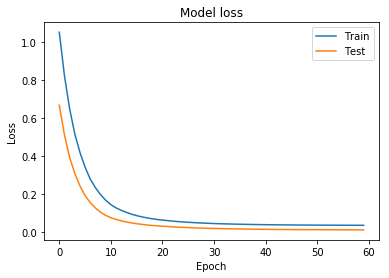

In [11]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

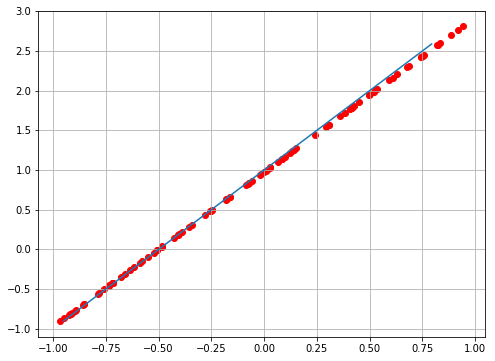

In [12]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

fig = plt.figure(figsize=[8,6])

plt.scatter(x_predicted, y_predicted,color='r', label ="Prediction")
plt.plot(x_valid, y_target, label= "Data")
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

__The results improve when incresing $N_{epochs}$ and $N_{train}$. If we increase the $\sigma$, there's lower performance (higher loss) of the training data compared to the training set. Plus, if the sigma is too high, it doesn converge to the original function no matter the number of epochs it runs for.__

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [13]:
def func1(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

In [14]:
# generate training inputs

training_size = 1000
validation_size = 30

np.random.seed(0) # set seed for reproducibility

x_train = np.random.uniform(-1, 1, training_size) # training set

x_valid = np.random.uniform(-1, 1, validation_size)  # validation set
x_valid.sort()

y_target = func1(x_valid) # target function to approximate

sigma = 0.2 # noise standard deviation
y_train = np.random.normal(func1(x_train) , sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(func1(x_valid) , sigma)

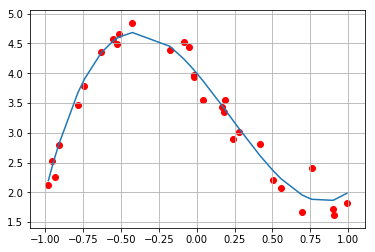

In [15]:
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); 
plt.show();

In [16]:
#model composition

"""
    Model 1 uses two hidden layers with relu acativation and a mini-batch approach, 
    the stochastic gradient descent as optimizer and mean squared error as performance metric.
"""

model1 = tf.keras.Sequential()

model1.add(Dense(3 ,input_shape=(1,)))

model1.add(Dense(15, activation='relu'))

model1.add(Dense(10, activation='relu'))

model1.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model1.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history1 = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 30 samples
Epoch 1/20
1000/1000 [==============================] - 0s 211us/sample - loss: 2.7807 - mean_squared_error: 2.7807 - val_loss: 1.2331 - val_mean_squared_error: 1.2331
Epoch 2/20
1000/1000 [==============================] - 0s 47u

In [17]:
#model composition

"""
    Model 2 is the same as Model 1, but with an increased number on neurons on each layer
"""

model2 = tf.keras.Sequential()

model2.add(Dense(6 ,input_shape=(1,)))

model2.add(Dense(30, activation='relu'))

model2.add(Dense(15, activation='relu'))

model2.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model2.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history2 = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 30)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 16        
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 30 samples
Epoch 1/20
1000/1000 [==============================] - 0s 186us/sample - loss: 3.2056 - mean_squared_error: 3.2056 - val_loss: 0.9885 - val_mean_squared_error: 0.9885
Epoch 2/20
1000/1000 [==============================] - 0s 49u

In [18]:
#model composition

"""
    Model 3 is the same as model 1, but with a smaller batch size
"""

model3 = tf.keras.Sequential()

model3.add(Dense(3 ,input_shape=(1,)))

model3.add(Dense(15, activation='relu'))

model3.add(Dense(10, activation='relu'))

model3.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model3.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=16, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_10 (Dense)             (None, 15)                60        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 30 samples
Epoch 1/20
1000/1000 [==============================] - 0s 181us/sample - loss: 2.5738 - mean_squared_error: 2.5738 - val_loss: 0.8940 - val_mean_squared_error: 0.8940
Epoch 2/20
1000/1000 [==============================] - 0s 69u

In [19]:
#model composition

"""
    Model 4 is the same as model 1, but now with a bigger batch size
"""

model4 = tf.keras.Sequential()

model4.add(Dense(3 ,input_shape=(1,)))

model4.add(Dense(15, activation='relu'))

model4.add(Dense(10, activation='relu'))

model4.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model4.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history4 = model4.fit(x=x_train, y=y_train, 
          batch_size=64, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_14 (Dense)             (None, 15)                60        
_________________________________________________________________
dense_15 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 30 samples
Epoch 1/20
1000/1000 [==============================] - 0s 152us/sample - loss: 6.9558 - mean_squared_error: 6.9558 - val_loss: 1.2760 - val_mean_squared_error: 1.2760
Epoch 2/20
1000/1000 [==============================] - 0s 25u

In [20]:
#model composition

"""
    Same as Model 1, but with the Adam optimizer
"""

model5 = tf.keras.Sequential()

model5.add(Dense(3 ,input_shape=(1,)))

model5.add(Dense(15, activation='relu'))

model5.add(Dense(10, activation='relu'))

model5.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model5.compile(optimizer='adam', loss='mse', metrics=['mse'])

model5.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history5 = model5.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_18 (Dense)             (None, 15)                60        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 30 samples
Epoch 1/20
1000/1000 [==============================] - 0s 222us/sample - loss: 11.1130 - mean_squared_error: 11.1130 - val_loss: 9.4612 - val_mean_squared_error: 9.4612
Epoch 2/20
1000/1000 [==============================] - 0s 3

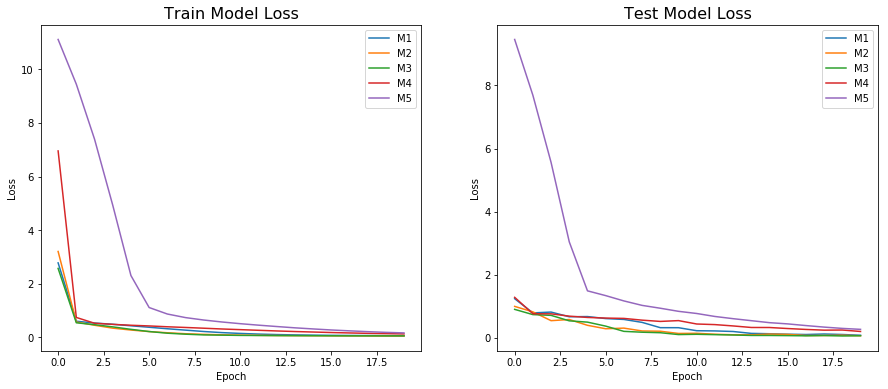

In [21]:
# look into training history
# Plot training & validation loss values

fig = plt.figure(figsize=(15,6))


plt.subplot(1,2,1)
plt.plot(history1.history['loss'], label = "M1")
plt.plot(history2.history['loss'], label = "M2")
plt.plot(history3.history['loss'], label = "M3")
plt.plot(history4.history['loss'], label = "M4")
plt.plot(history5.history['loss'], label = "M5")

plt.title('Train Model Loss', fontsize = 16)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')


plt.subplot(1,2,2)
plt.plot(history1.history['val_loss'], label = "M1")
plt.plot(history2.history['val_loss'], label = "M2")
plt.plot(history3.history['val_loss'], label = "M3")
plt.plot(history4.history['val_loss'], label = "M4")
plt.plot(history5.history['val_loss'], label = "M5")

plt.title('Test Model Loss', fontsize = 16)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.show()

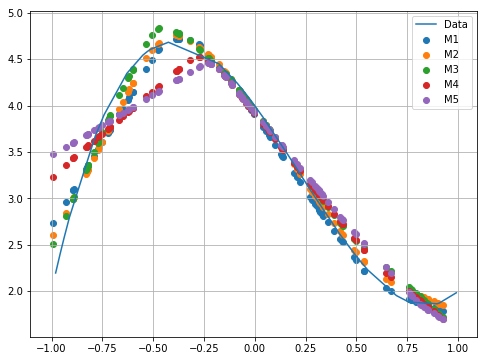

In [22]:
x_predicted = np.random.uniform(-1, 1, 100)

y1_predicted = model1.predict(x_predicted)
y2_predicted = model2.predict(x_predicted)
y3_predicted = model3.predict(x_predicted)
y4_predicted = model4.predict(x_predicted)
y5_predicted = model5.predict(x_predicted)


fig = plt.figure(figsize=[8,6])

# comment the unnecesary one for comparisons

plt.scatter(x_predicted, y1_predicted, label ="M1")
plt.scatter(x_predicted, y2_predicted, label ="M2")
plt.scatter(x_predicted, y3_predicted, label ="M3")
plt.scatter(x_predicted, y4_predicted, label ="M4")
plt.scatter(x_predicted, y5_predicted, label ="M5")

plt.plot(x_valid, y_target, label= "Data")

plt.legend(loc="best")
plt.grid(True)
plt.show()

__The first model was the result of a combination between research and trial and error in order to figure out a suitable network for the job.__

__The number of hidden layers (2) seems to be a standard approach (as found by searching the internet), but the rest of the settings we eyeballed based on the first exercise.__

__The variation on the number of neurons (Model 2) does not seem to have a big impact in this case, although it may for some more complex models.__

__Batch size seemed to make a difference, as turning it up means a worse result overall, whereas halving it gave us a much better fit.__

__Finally, changing optimizer to Adam in this case meant a slower learning rate, but with a similar end result.__

__It is also noteworthy that, for a large number of training points (~5000) all the models perform pretty much the same and manage to replicate the function nicely.__

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [23]:
def func2D(x,y):
    return np.sin(x**2 + y**2)

In [24]:
# generate training inputs

training_size = 2000
validation_size = 100


np.random.seed(0) # set seed for reproducibility

x1_train = np.random.uniform(-3/2, 3/2, training_size) # training set
x2_train = np.random.uniform(-3/2, 3/2, training_size) 

x_train = np.vstack((x1_train, x2_train))

x1_valid = np.random.uniform(-3/2, 3/2, validation_size)  # validation set 
x2_valid = np.random.uniform(-3/2, 3/2, validation_size)  # validation set

x_valid = np.vstack((x1_valid, x2_valid))

f_target = func2D(x_valid[0], x_valid[1]) # target function to approximate

sigma = .05 # noise standard deviation
f_train = np.random.normal(func2D(x_train[0], x_train[1]), sigma) # actual measures from which we want to guess regression parameters
f_valid = np.random.normal(func2D(x_valid[0], x_valid[1]), sigma) 

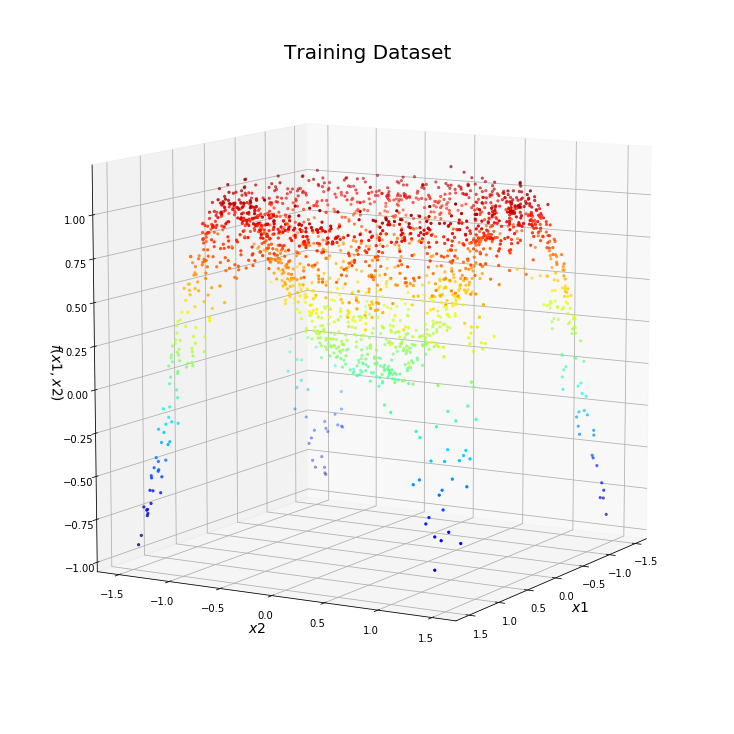

In [25]:
fig = plt.figure(figsize=[10,10])

plt.set_cmap("jet")
ax = Axes3D(fig)

ax.scatter(x_train[0], x_train[1], f_train, c=f_train, marker='.', s=20)

ax.set_title("Training Dataset", fontsize = 20)
ax.set_xlabel('$x1$', fontsize = 14)
ax.set_ylabel('$x2$', fontsize = 14)
ax.set_zlabel('$f(x1, x2)$', fontsize = 14)
ax.view_init(10, 30)
plt.show()

In [26]:
#model composition

x_train = np.transpose(x_train)
x_valid = np.transpose(x_valid)

model2D = tf.keras.Sequential()

model2D.add(Dense(6 ,input_shape=(2,)))

model2D.add(Dense(30, activation='relu'))

model2D.add(Dense(15, activation='relu'))

model2D.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model2D.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model2D.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history2D = model2D.fit(x=x_train, y=f_train, 
          batch_size=32, epochs=120,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, f_valid))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_22 (Dense)             (None, 30)                210       
_________________________________________________________________
dense_23 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 16        
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples, validate on 100 samples
Epoch 1/120
2000/2000 [==============================] - 0s 114us/sample - loss: 0.2297 - mean_squared_error: 0.2297 - val_loss: 0.0928 - val_mean_squared_error: 0.0928
Epoch 2/120
2000/2000 [==============================] - 0s 

2000/2000 [==============================] - 0s 32us/sample - loss: 0.0803 - mean_squared_error: 0.0803 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 45/120
2000/2000 [==============================] - 0s 47us/sample - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0507 - val_mean_squared_error: 0.0507
Epoch 46/120
2000/2000 [==============================] - 0s 45us/sample - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0543 - val_mean_squared_error: 0.0543
Epoch 47/120
2000/2000 [==============================] - 0s 49us/sample - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.0565 - val_mean_squared_error: 0.0565
Epoch 48/120
2000/2000 [==============================] - 0s 45us/sample - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 49/120
2000/2000 [==============================] - 0s 40us/sample - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.0490 - val_mean_squared_error: 0.0490

2000/2000 [==============================] - 0s 53us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 93/120
2000/2000 [==============================] - 0s 38us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 94/120
2000/2000 [==============================] - 0s 32us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 95/120
2000/2000 [==============================] - 0s 31us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 96/120
2000/2000 [==============================] - 0s 32us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 97/120
2000/2000 [==============================] - 0s 33us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0149 - val_mean_squared_error: 0.0149

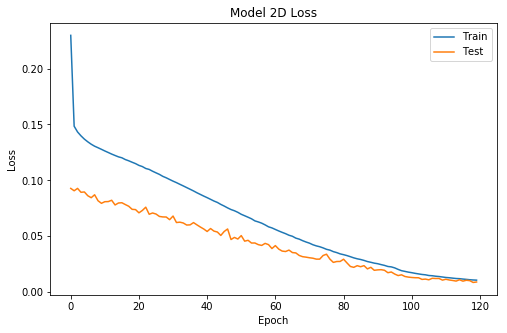

In [27]:
# look into training history
# Plot training & validation loss values

fig = plt.figure(figsize=(8,5))

plt.plot(history2D.history['loss'])
plt.plot(history2D.history['val_loss'])
plt.title('Model 2D Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

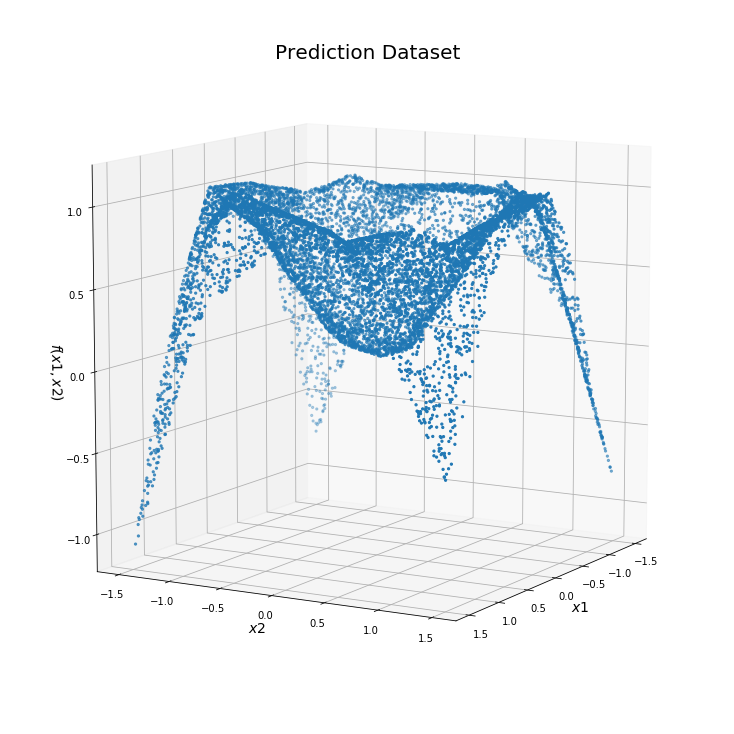

In [28]:
x1_predict = np.random.uniform(-3/2, 3/2, 10000)  # prediction set 
x2_predict = np.random.uniform(-3/2, 3/2, 10000)  # prediction set 
x_predict = np.vstack((x1_predict, x2_predict))

x_predict = np.transpose(x_predict)

f_predicted = model2D.predict(x_predict)

fig = plt.figure(figsize=[10,10])

plt.set_cmap("jet")
ax = Axes3D(fig)

ax.scatter(x1_predict, x2_predict, f_predicted, marker='.', s=20)

ax.set_title("Prediction Dataset", fontsize = 20)
ax.set_xlabel('$x1$', fontsize = 14)
ax.set_ylabel('$x2$', fontsize = 14)
ax.set_zlabel('$f(x1, x2)$', fontsize = 14)
ax.view_init(10, 30)
plt.show()

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [29]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

In [ ]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()